Color Image Processing
Color Spaces - RGB , Gray Scale , CMY, CMYK , HSI Model

In [19]:
import numpy as np
from matplotlib import pyplot as plt

Read the image using pyplot.imread(). This function can read multiple image types (e.g. *.jpg and *.png).
We use matplotlib figure object and "imshow()"- to dispaly the image

This image is composed of three color channels, and one alpha channel. (Sometimes there is no alpha channel) Now if we want to know how many channels their are we can use the numpy shape command.

(742, 757, 3)


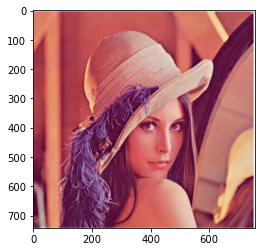

In [20]:
img = plt.imread("images/girl.jpg")
print(img.shape)
plt.figure()
img_rgb=np.divide(np.double(img),255)
plt.imshow(img_rgb)
plt.show()

Definition for  each channel plotting

In [21]:
def plot_channels(orig,img,titles,colmap):
    plt.figure(figsize = (12,12))
    plt.subplot(5,5,1), plt.imshow(orig)
    plt.title(titles[0])
    for i in range(img.shape[2]):
        plt.subplot(5,5,i+2),plt.imshow(img[:,:,i],cmap=colmap[i] if colmap else 'gray')
        plt.title(titles[i+1])
    plt.tight_layout()
    plt.show()

1. Displaying all the channels(RGB)

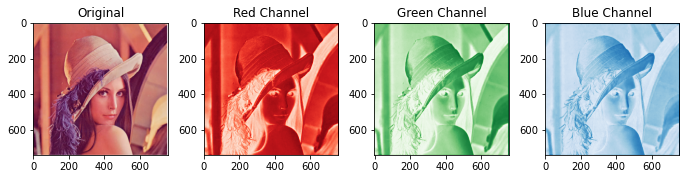

In [22]:
titles = ['Original','Red Channel','Green Channel','Blue Channel']
colmap = ['Reds','Greens','Blues']
plot_channels(img,img_rgb,titles,colmap)

2. Converting to Gray scale images using weighted sum of color components and average of color components

If we want to know only the amount of light intensity in every pixel (without the color), we can just add all the channels together. The problem with this approach is that the human eye is much more sensitive to green light, so we loose contrast. To avoid this we can use a weighted sum of the channels (CIE 1931). ie., we perceive both red and green as being substantially brighter than blue, the resulting image will appear to be too dark in the red and green areas and too bright in the blue ones. 

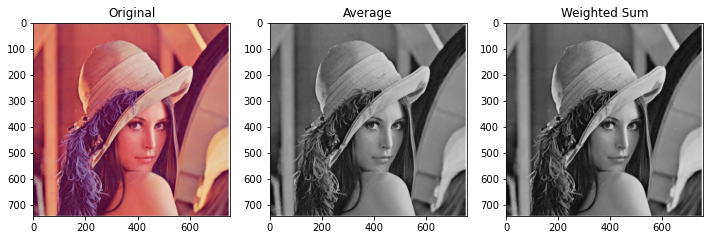

In [23]:
R = img_rgb[:,:,0] 
G = img_rgb[:,:,1] 
B = img_rgb[:,:,2]
grayScImg = (R+G+B)/3
grayScImg_wt = 0.2125 * R + 0.7154 * G + 0.072 * B
plt.figure(figsize = (12,12))
plt.subplot(131), plt.imshow(img)
plt.title('Original')
plt.subplot(132)
plt.title('Average')
plt.imshow(grayScImg,cmap = "gray")
plt.subplot(133)
plt.title('Weighted Sum')
plt.imshow(grayScImg_wt,cmap = "gray")
plt.show()

3. CMY(Cyan, magenta, yellow) Color model  - The CMY color model uses subtractive color mixing which is used in printing processes

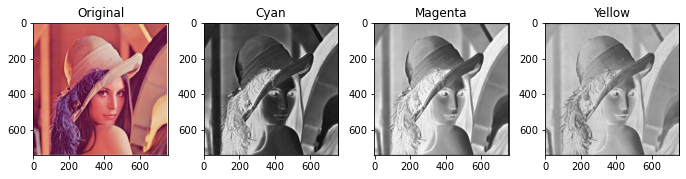

In [24]:
h,w,n = img_rgb.shape
C = np.zeros((h,w))
M = np.zeros((h,w))
Y = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        C[i][j] = 1-img_rgb[i][j][0]
        M[i][j] = 1-img_rgb[i][j][1]
        Y[i][j] = 1-img_rgb[i][j][2]
        
img_cmy = np.dstack((C,M,Y))
titles = ['Original','Cyan','Magenta','Yellow']
colmap=[]
plot_channels(img,img_cmy,titles,colmap)

4. CMYK MODEL  - also used in printing processes.
Equal amounts of the pigment primaries, cyan, magenta, and yellow, will produce black

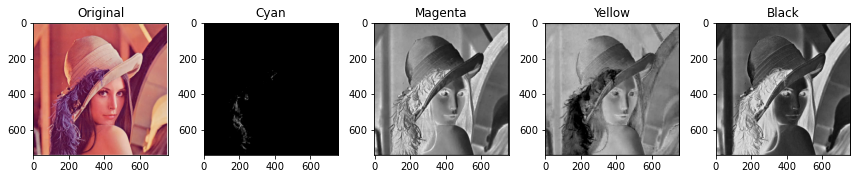

In [25]:
h,w,n = img_cmy.shape
C = np.zeros((h,w))
M = np.zeros((h,w))
Y = np.zeros((h,w))
K = np.zeros((h,w))
for i in range(h):
    for j in range(w):
        C1  = img_cmy[i][j][0]
        M1 = img_cmy[i][j][1]
        Y1 = img_cmy[i][j][2]
        K[i][j] = min(C1,M1,Y1)
        if K[i][j]==1:
            C[i][j]=0
            M[i][j]=0
            Y[i][j]=0
        else:
            C[i][j] = (C1-K[i][j]) /(1-K[i][j])
            M[i][j] = (M1-K[i][j]) /(1-K[i][j])
            Y[i][j] = (Y1-K[i][j]) /(1-K[i][j])
img_cmyk = np.dstack((C,M,Y,K))
titles = ['Original','Cyan','Magenta','Yellow','Black']
colmap=[]
plot_channels(img,img_cmyk,titles,colmap)

5. HSI Model 
-> decouples the intensity component from the color-carrying information(hue and saturation) in a color image.
-> is a useful tool for developing image processing algorithms based on color descriptions that are natural and intuitive to humans

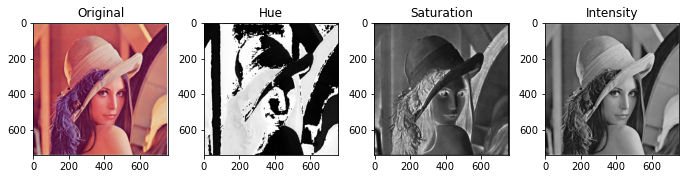

In [26]:
h,w,n = img_rgb.shape
H = np.zeros((h,w))
S = np.zeros((h,w))
I = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        r = R[i][j]
        g = G[i][j]
        b = B[i][j]
        I[i][j] = (R[i][j] + G[i][j] + B[i][j]) / 3
        S[i][j] = 1 - min(R[i][j], G[i][j], B[i][j])/I[i][j]
        num = 0.5 * ((r - g) + (r - b))
        den = np.sqrt((r - g)**2 + (r - b) * (g - b))
        h = np.rad2deg((np.arccos(num / (den + 0.0000001))))
        if b > g:
            H[i][j] = 360 - h
        else:
            H[i][j] = h      
img_hsi = np.dstack((H,S,I))
titles = ['Original','Hue','Saturation','Intensity']
colmap=[]
plot_channels(img,img_hsi,titles,colmap)

Displaying Original + GrayScale + CMY + CMYK + HSL Color Space model Images

Text(0.5, 1.0, 'HSI Image')

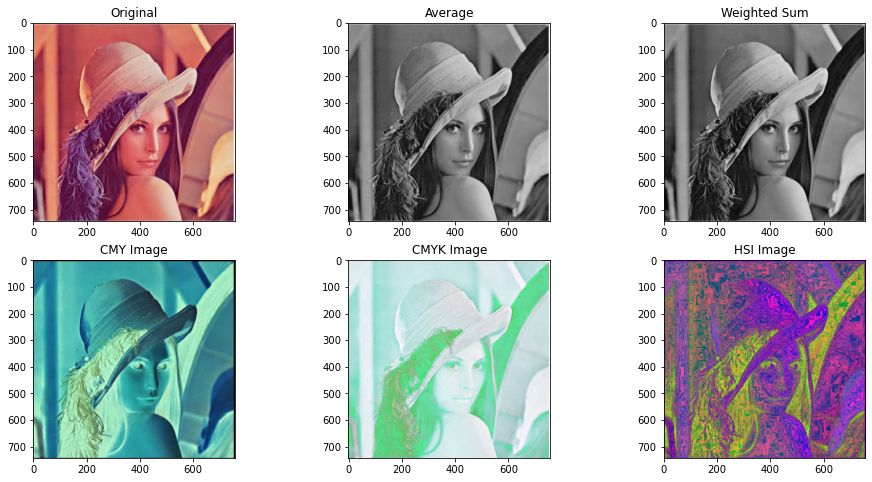

In [27]:
plt.figure(figsize = (16,8))
plt.subplot(231),plt.imshow(img)
plt.title('Original')
plt.subplot(232),plt.imshow(grayScImg,cmap = 'gray')
plt.title('Average')
plt.subplot(233),plt.imshow(grayScImg_wt,cmap = 'gray')
plt.title('Weighted Sum')
plt.subplot(234),plt.imshow(img_cmy,cmap='gray')
plt.title('CMY Image')
plt.subplot(235),plt.imshow(img_cmyk,cmap='gray')
plt.title('CMYK Image')
plt.subplot(236),plt.imshow((img_hsi* 255).astype(np.uint8),cmap='gray')
plt.title('HSI Image')